In [132]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
data = pd.read_csv("Downloads/train.csv")
test = pd.read_csv("Downloads/test (2).csv")

In [134]:
data.shape

(2000, 21)

In [135]:
for i in data.columns:
    print(data[i].value_counts())

1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_power, Length: 1094, dtype: int64
0    1010
1     990
Name: blue, dtype: int64
0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
1    1019
0     981
Name: dual_sim, dtype: int64
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64
27    47
14    45
16    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64
0.1    320
0.2    

In [136]:
cont_col = ['battery_power','px_height','px_width','ram']
cat_col = ['blue','dual_sim','four_g','m_dep','n_cores','pc','three_g','touch_screen','wifi','price_range']
discrete = ['clock_speed','fc','int_memory','mobile_wt','talk_time','sc_h','sc_w']

In [137]:
import warnings
warnings.filterwarnings('ignore')

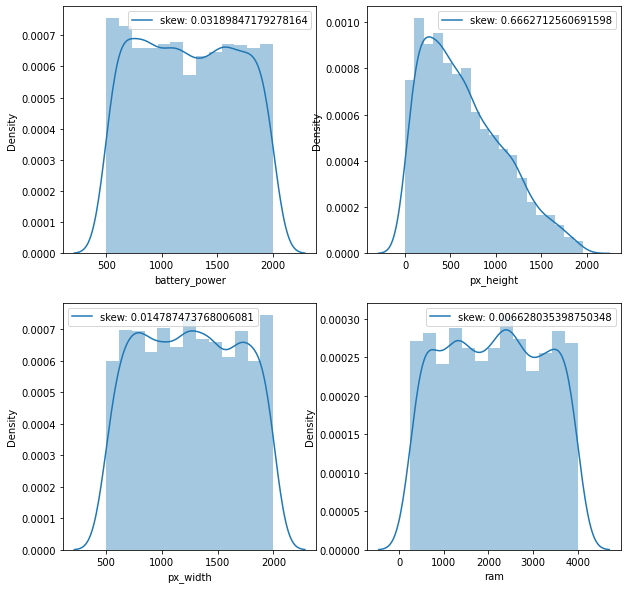

In [138]:
c= 1
plt.figure(figsize = (10,10))
for i in cont_col:
    plt.subplot(2,2,c)
    c=c+1
    sb.distplot(data[i])
    plt.legend(['skew: '+str(data[i].skew())])

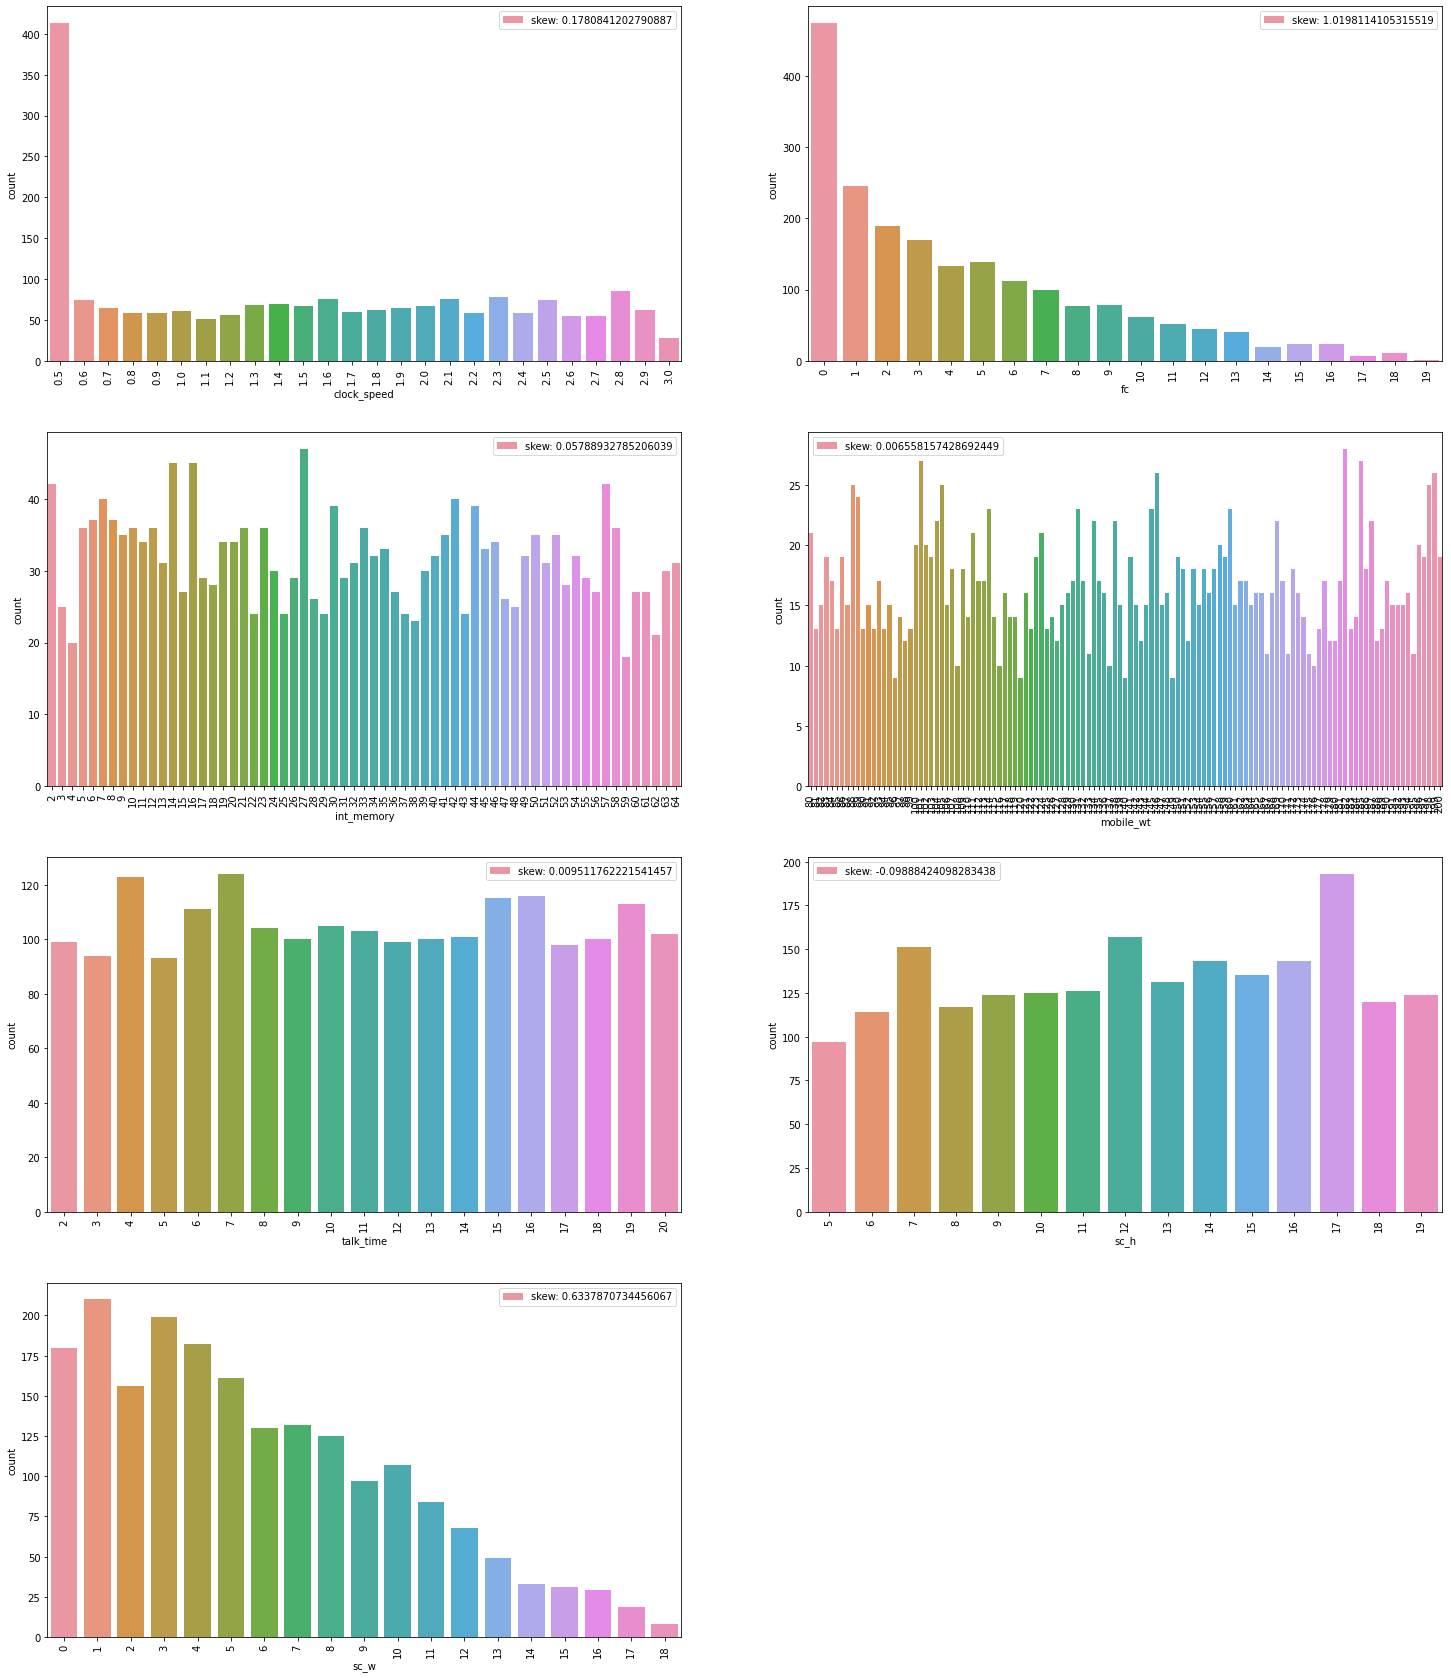

In [139]:
c= 1
plt.figure(figsize = (25,30))
for i in discrete:
    plt.subplot(4,2,c)
    c=c+1
    sb.countplot(data[i])
    
    plt.legend(['skew: '+str(data[i].skew())])
    plt.xticks(rotation=90)

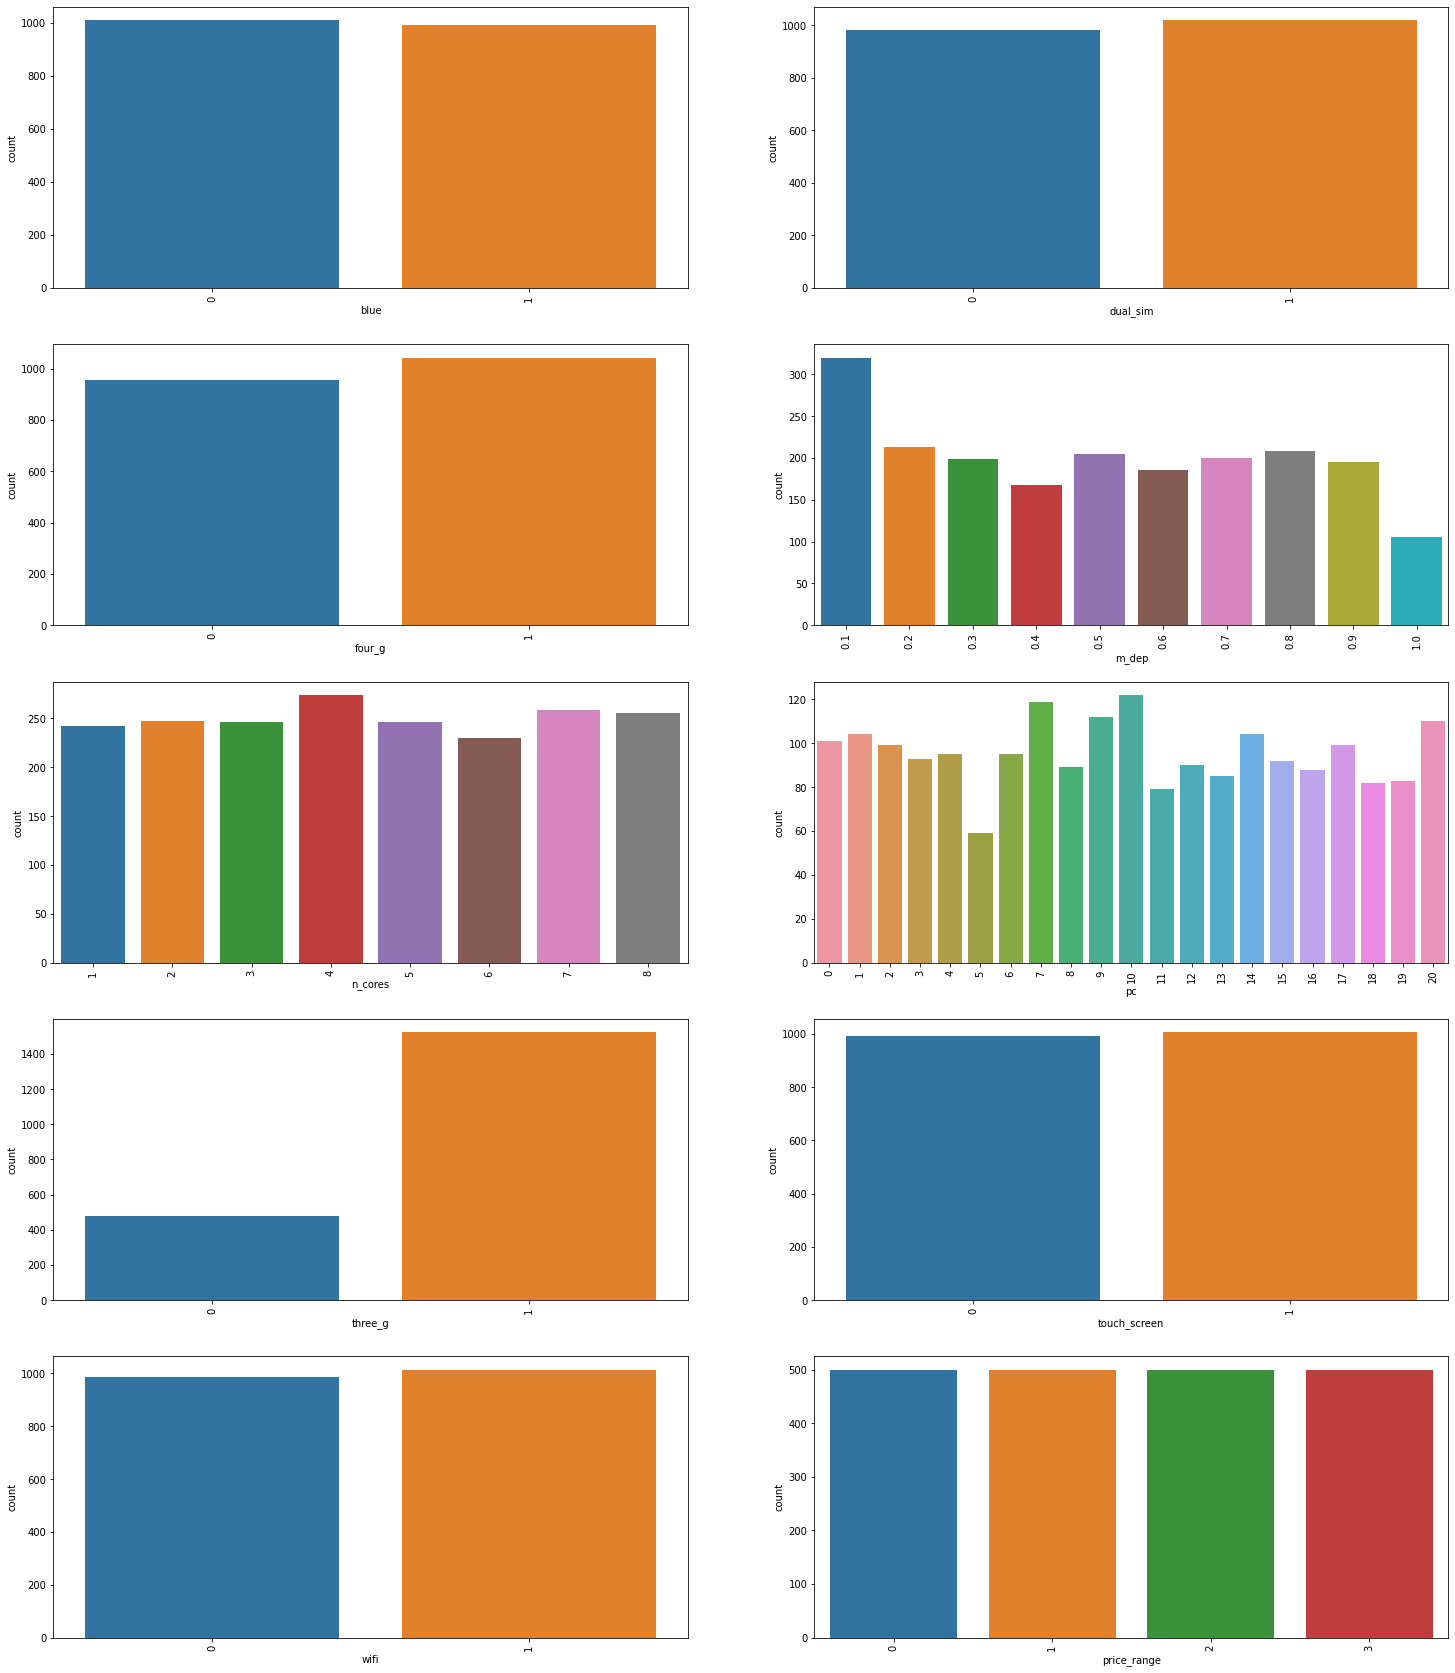

In [140]:
c= 1
plt.figure(figsize = (25,30))
for i in cat_col:
    plt.subplot(5,2,c)
    c=c+1
    sb.countplot(data[i])
    
   # plt.legend(['skew: '+str(data[i].skew())])
    plt.xticks(rotation=90)

<AxesSubplot:>

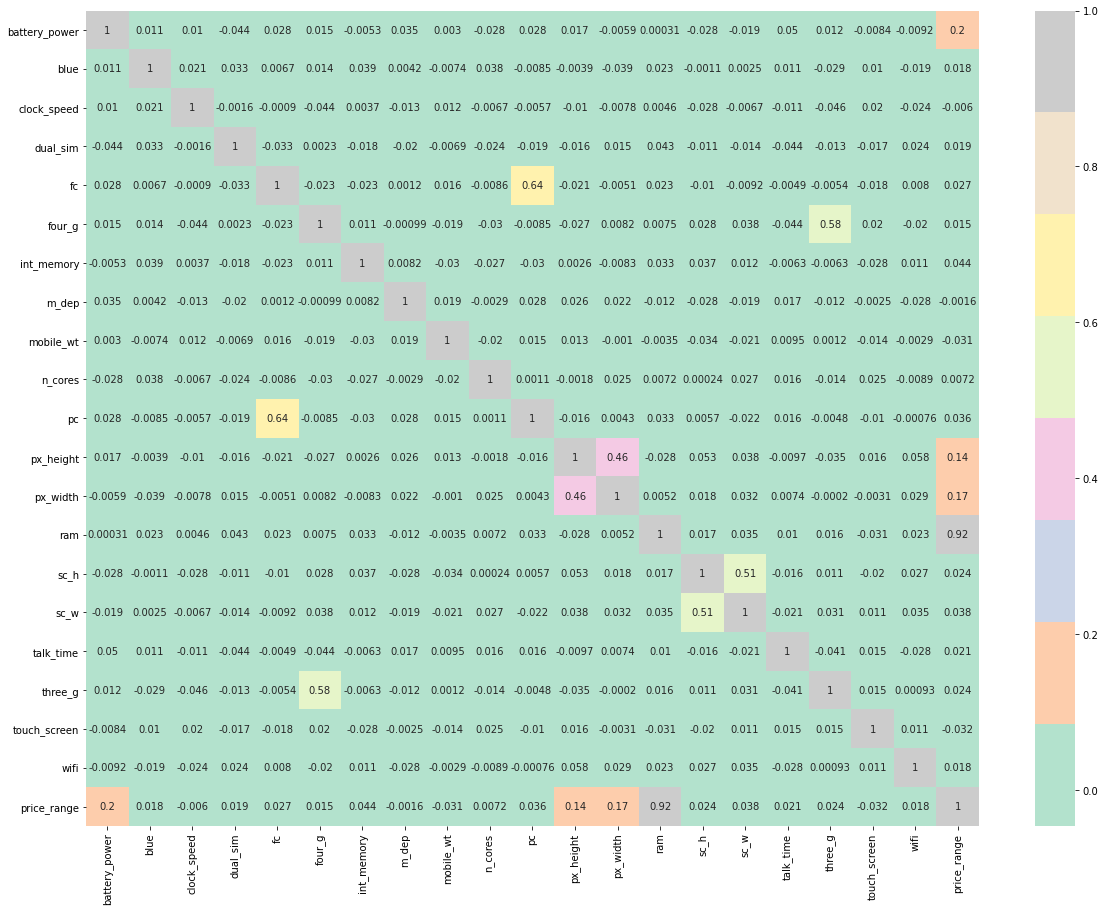

In [141]:
plt.figure(figsize = (20,15))
sb.heatmap(train.corr(),annot=True,cmap='Pastel2')

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
x = data.drop(['price_range','mobile_wt','sc_h','px_width'],axis=1)
y = data['price_range']

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,feature,VIF
0,battery_power,7.543843
1,blue,1.973935
2,clock_speed,4.097058
3,dual_sim,1.977691
4,fc,3.410551
5,four_g,3.191826
6,int_memory,3.840447
7,m_dep,3.791047
8,n_cores,4.449230
9,pc,6.104625


<AxesSubplot:>

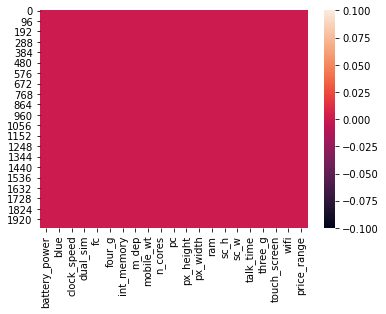

In [144]:
sb.heatmap(data.isnull())

In [145]:
from scipy.stats import zscore

In [146]:
zscores = np.abs(zscore(data))

In [147]:
np.where(zscores>3)

(array([  95,  226,  305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
        1888], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64))

In [148]:
train = data[(zscores<3).all(axis=1)]

In [149]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [64]:
from sklearn.preprocessing import PowerTransformer,StandardScaler

In [58]:
power = PowerTransformer() 


In [62]:
train[['px_height'] ]= power.fit_transform(train[['px_height'] ])



In [195]:
train[cont_col].skew()

battery_power    0.036397
px_height        0.665255
px_width         0.014207
ram              0.004281
dtype: float64

In [196]:
test[['px_height'] ]= power.fit_transform(test[['px_height'] ])

In [66]:
features = StandardScaler().fit_transform(train.drop('price_range',1))

In [198]:
scaled_x = pd.DataFrame(features,columns=train.columns[:-1])

In [200]:
id_test = test['id']

In [204]:
test_data = pd.DataFrame(StandardScaler().fit_transform(test.drop('id',1)),columns=test.columns[1:])

In [150]:

y = train['price_range']

In [151]:
from sklearn.decomposition import PCA

In [152]:
pca = PCA()

In [155]:
pca.fit(x,y)

PCA()

In [156]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09757254, 0.19168492, 0.25877056, 0.32359229, 0.38679645,
       0.44982379, 0.50986718, 0.56911302, 0.62803862, 0.68524565,
       0.74146399, 0.79635288, 0.85014368, 0.90291308, 0.95459275,
       0.97890521, 1.        ])

In [208]:
sb.pairplot(train)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E2FB7B6A60> (for post_execute):


KeyboardInterrupt: 

In [78]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split,cross_val_score
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score

In [159]:
   
def random_state(model):
    randomstate = 0
    max_score = 0
   
    for i in range(1,50):
        x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=.30,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
        print( 'Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score)
       # print('TRAIN SCORE:   ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')))

In [160]:
random_state(LGBMClassifier())

Random State= 1  and R2 Score of LR MODEL :  0.8894472361809045
Random State= 2  and R2 Score of LR MODEL :  0.9112227805695142
Random State= 3  and R2 Score of LR MODEL :  0.916247906197655
Random State= 3  and R2 Score of LR MODEL :  0.916247906197655
Random State= 3  and R2 Score of LR MODEL :  0.916247906197655
Random State= 3  and R2 Score of LR MODEL :  0.916247906197655
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL :  0.9229480737018425
Random State= 7  and R2 Score of LR MODEL : 

In [170]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=.30,random_state=48)

------------ LGBMClassifier() --------------
 Accuracy Score         :  0.931323283082077
Cross Validation Score  :  0.8892834119800932


_____________CLASSIFICATION REPORT___________________


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       161
           1       0.91      0.90      0.90       146
           2       0.93      0.90      0.91       156
           3       0.94      0.96      0.95       134

    accuracy                           0.93       597
   macro avg       0.93      0.93      0.93       597
weighted avg       0.93      0.93      0.93       597



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

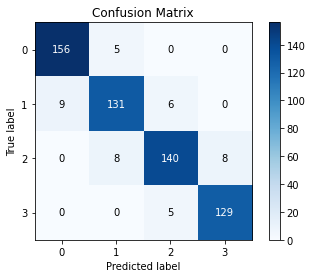

In [172]:
    model = LGBMClassifier()
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    
   
    print('Cross Validation Score  : ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')))
    
    print('\n\n_____________CLASSIFICATION REPORT___________________\n\n')
    print(classification_report(y_test,predictions))
    
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)

------------ RandomForestClassifier() --------------
 Accuracy Score         :  0.8961474036850922
Cross Validation Score  :  0.8590933704649185


_____________CLASSIFICATION REPORT___________________


              precision    recall  f1-score   support

           0       0.93      0.95      0.94       161
           1       0.84      0.84      0.84       146
           2       0.88      0.83      0.86       156
           3       0.93      0.96      0.95       134

    accuracy                           0.90       597
   macro avg       0.90      0.90      0.90       597
weighted avg       0.90      0.90      0.90       597



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

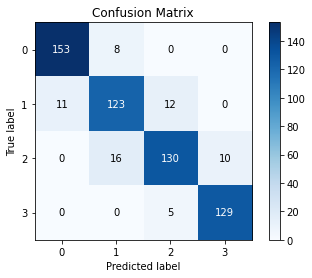

In [173]:
    model = RandomForestClassifier()
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    
   
    print('Cross Validation Score  : ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')))
    
    print('\n\n_____________CLASSIFICATION REPORT___________________\n\n')
    print(classification_report(y_test,predictions))
    
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)

------------ DecisionTreeClassifier() --------------
 Accuracy Score         :  0.8592964824120602
Cross Validation Score  :  0.8109383460973157


_____________CLASSIFICATION REPORT___________________


              precision    recall  f1-score   support

           0       0.91      0.94      0.92       161
           1       0.81      0.79      0.80       146
           2       0.83      0.78      0.81       156
           3       0.89      0.93      0.91       134

    accuracy                           0.86       597
   macro avg       0.86      0.86      0.86       597
weighted avg       0.86      0.86      0.86       597



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

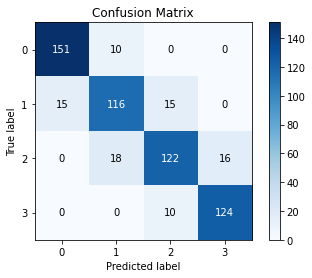

In [174]:
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    
   
    print('Cross Validation Score  : ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')))
    
    print('\n\n_____________CLASSIFICATION REPORT___________________\n\n')
    print(classification_report(y_test,predictions))
    
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)

[10:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) --------------
 Accuracy Score         :  0.93299

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

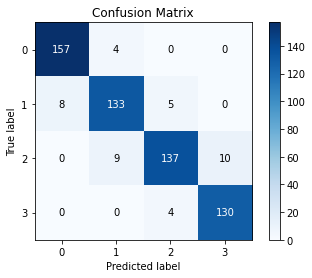

In [178]:
    model = XGBClassifier()
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    
   
    print('Cross Validation Score  : ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')))
    
    print('\n\n_____________CLASSIFICATION REPORT___________________\n\n')
    print(classification_report(y_test,predictions))
    
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)

In [179]:
params = {
    'n_estimators': [50,100,200],
    'max_depth': [5,10,15,7],
    'learning_rate': [0.1,.5,.2,0.01],
    'gamma': [.1,.5,1,2],
    'subsample': [1,.8,.75,.6],
    'min_child_weight': [1,3,5,2]
    
    
}

In [182]:
boost = XGBClassifier()
grid = RandomizedSearchCV(boost,params,cv=5,n_iter=20,scoring='accuracy',verbose=2)

In [183]:
grid.fit(scaled_x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[10:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.4s
[10:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END gamma=1, learning_rate=0.01, max_depth=7, min_child_weight=2, n_estimators=100, subsample=0.8; total time=   0.4s
[10:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [187]:
grid.best_estimator_,grid.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.5, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=200, n_jobs=8, num_parallel_tree=1,
               objective='multi:softprob', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=0.6,
               tree_method='exact', validate_parameters=1, verbosity=None),
 0.9169866967077199)

[10:22:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None) --------------
 Accuracy Score         :  0.924623115

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

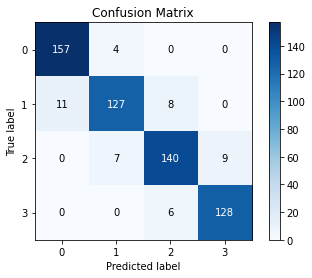

In [189]:
    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.5, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=np.NaN, monotone_constraints='()',
               n_estimators=200, n_jobs=8, num_parallel_tree=1,
               objective='multi:softprob', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=0.6,
               tree_method='exact', validate_parameters=1, verbosity=None)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    
   
    print('Cross Validation Score  : ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')))
    
    print('\n\n_____________CLASSIFICATION REPORT___________________\n\n')
    print(classification_report(y_test,predictions))
    
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)

In [190]:
params_lgbr = {
    'num_leaves': [70,80,50,40,20],
    'max_depth': [5,7,10,12,15],
   
    'bagging_freq': [5,10,15,7,12], 
    "bagging_fraction": [0.75,.6,.5,.8,.85,.7],
    'learning_rate': [.01,.02,.1,.5]
}
LightGBR = LGBMClassifier()
grid_l= RandomizedSearchCV(LightGBR,params_lgbr,cv=5,scoring='accuracy',n_iter=50,verbose=2) 

In [191]:
grid_l.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV] END bagging_fraction=0.75, bagging_freq=5, learning_rate=0.1, max_depth=7, num_leaves=50; total time=   0.1s
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV] END bagging_fraction=0.75, bagging_freq=5, learning_rate=0.1, max_depth=7, num_leaves=50; total time=   0.1s
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[CV] END bagging_fraction=0.7

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=50,
                   param_distributions={'bagging_fraction': [0.75, 0.6, 0.5,
                                                             0.8, 0.85, 0.7],
                                        'bagging_freq': [5, 10, 15, 7, 12],
                                        'learning_rate': [0.01, 0.02, 0.1, 0.5],
                                        'max_depth': [5, 7, 10, 12, 15],
                                        'num_leaves': [70, 80, 50, 40, 20]},
                   scoring='accuracy', verbose=2)

In [192]:
grid_l.best_estimator_,grid_l.best_score_

(LGBMClassifier(bagging_fraction=0.75, bagging_freq=12, max_depth=5,
                num_leaves=20),
 0.9015033134782495)

[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
------------ LGBMClassifier(bagging_fraction=0.75, bagging_freq=12, max_depth=5,
               num_leaves=20) --------------
 Accuracy Score         :  0.9413735343383585
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] b

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 432x288 with 0 Axes>

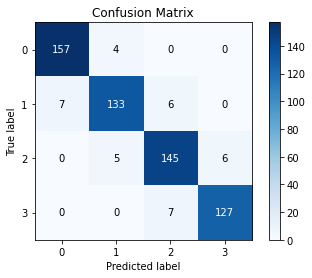

In [210]:
    lgb = LGBMClassifier(bagging_fraction=0.75, bagging_freq=12, max_depth=5,
                num_leaves=20)
    lgb.fit(x_train,y_train)
    predictions = lgb.predict(x_test)
    
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    
   
    print('Cross Validation Score  : ',np.mean(cross_val_score(lgb,x_train,y_train,cv=5,scoring='accuracy')))
    
    print('\n\n_____________CLASSIFICATION REPORT___________________\n\n')
    print(classification_report(y_test,predictions))
    
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)

In [209]:
test_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.876025,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.435752,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.326750,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.647531,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.441621,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.044531,0.968496,0.433249,-1.034598,-1.029568,1.026347,1.122981,-0.062340,0.875263,1.168338,1.140174,0.228700,-0.743596,-0.016549,0.464287,0.633326,0.712481,0.568112,1.0,-1.014099
996,-1.479519,-1.032529,0.312601,0.966559,-1.029568,-0.974329,-1.139759,1.362567,1.334582,-0.143419,-1.322051,1.145141,0.892536,-0.189415,-0.925101,-1.018419,1.440430,-1.760216,1.0,0.986097
997,-0.146932,-1.032529,-0.169994,-1.034598,-0.805408,1.026347,-1.415702,-0.062340,-1.708411,-1.455175,0.319433,-0.149387,-0.943846,-0.842260,-1.619796,-1.254383,0.530493,0.568112,-1.0,-1.014099
998,0.658173,0.968496,-1.255832,0.966559,-1.029568,-0.974329,0.902226,-0.418566,0.903970,-1.017923,0.319433,-1.817413,-0.927917,0.340217,0.695852,1.341217,-0.925406,-1.760216,1.0,-1.014099


In [211]:
pred_test = lgb.predict(test_data)

In [213]:
table_pred = pd.DataFrame({'id':id_test,'price_range':pred_test})

In [216]:
table_pred.to_csv('mobile_price.csv')